# Ensemble Methods

So far we have learnt how to create a classifier and use a range of preprocessing methods and hyperparameter tuning techniques to improve our accuracy or prediction. In this lab, we shall look at some ensemble techniques which combine multiple classifiers to achieve better results.

- Bagging
- Boosting
- Stacking

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
missing_count = df.isnull().sum()
missing_count[missing_count > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.dropna(subset=["Age"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.Embarked.fillna(value=df.Embarked.mode().loc[0],inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

le = LabelEncoder()
df.Embarked = le.fit_transform(df.Embarked)

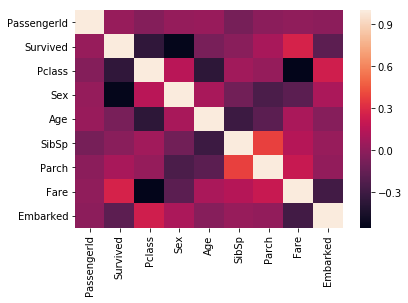

In [8]:
sns.heatmap(df.corr())

In [9]:
cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin'
]

df = df.drop(cols_to_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
df.isnull().any().any()

False

In [11]:
X = df.drop('Survived',axis=1)
y = df['Survived']

print (X.shape, y.shape)

(714, 7) (714,)


## Splitting the dataset

Split dataset into train and validation sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Creation and Evaluation

Create a classifier and train it.

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)

Generate predictions on the validation data and print the accuracy of the model on it.

In [14]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val,y_pred)

print(accuracy)

0.7953488372093023


How were the results? We will now try to use some additional techniques to improve the accuracy.

## Bagging

Use the BaggingClassifier from sklearn as a model, and let the base estimator be the model you previously used. Generate the new accuracy.

In [15]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier()).fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_val)
bag_acc = accuracy_score(y_val,y_pred_bag)

print(bag_acc)

0.8232558139534883


The RandomForest algorithm uses bagging on decision trees. Use the RandomForestClassifier from sklearn and print its accuracy.

In [16]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_val)
rf_acc = accuracy_score(y_val,y_pred_rf)

print(rf_acc)

0.8093023255813954


## Boosting

### Weight-based

Use adaboost classifier to generate predictions on the validation data and print the accuracy.

In [17]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier().fit(X_train,y_train)
y_pred_ab = ab_clf.predict(X_val)
ab_acc = accuracy_score(y_val,y_pred_ab)

print(ab_acc)

0.7953488372093023


### Residual-based

Using gradient boosted decision trees from sklearn generate predictions and print the accuracy.

In [18]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_gb = gb_clf.predict(X_val)
gb_acc = accuracy_score(y_val,y_pred_gb)

print(gb_acc)

0.8465116279069768


Using the xgboost classifier, generate predictions on the validation data and print the new accuracy.

You can use the following commands to install xgboost.

`conda install -c conda-forge xgboost` (Linux and OSX)

`conda install -c anaconda py-xgboost` (All)

In [19]:
#XGBClassifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier().fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_val)
xgb_acc = accuracy_score(y_val,y_pred_xgb)

print(xgb_acc)

0.8511627906976744


## Stacking

We'll split the training dataset into two parts - A & B. The base models will be trained on A. Their predictions on B will be used to train a meta model.

In [20]:
n = len(X_train)
X_A = X_train[:n//2]
y_A = y_train[:n//2]
X_B = X_train[n//2:]
y_B = y_train[n//2:]

Train the base models on dataset A and generate predictions on dataset B

In [21]:
clf_1 = DecisionTreeClassifier().fit(X_A, y_A)
y_pred_1 = clf_1.predict(X_B)
clf_2 = RandomForestClassifier(n_estimators=100).fit(X_A, y_A)
y_pred_2 = clf_2.predict(X_B)
clf_3 = GradientBoostingClassifier().fit(X_A, y_A)
y_pred_3 = clf_3.predict(X_B)

Create a new dataset C with predictions of base models on B

In [22]:
X_C = pd.DataFrame({'RandomForest': y_pred_2, 'DeccisionTrees': y_pred_1, 'GradientBoost': y_pred_3})
y_C = y_B
X_C.head()

,RandomForest,DeccisionTrees,GradientBoost
0,0,0,0
1,0,1,1
2,1,1,1
3,1,1,0
4,1,1,1


Combine predictions made by base models on validation set to create a dataset D

In [23]:
X_D = pd.DataFrame({'RandomForest': clf_2.predict(X_val), 'DeccisionTrees': clf_1.predict(X_val), 'GradientBoost': clf_3.predict(X_val)})
y_D = y_val

Train a meta model on C and print its accuracy on D.

In [24]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier().fit(X_C,y_C)
y_pred_xgb = xgb_clf.predict(X_D)
xgb_acc = accuracy_score(y_D,y_pred_xgb)

print(xgb_acc)

0.8325581395348837


## Majority Voting Techniques

Instead of just using one classifier, you can gather predictions from different classifiers, and let them 'vote' for the most appropriate label. This can be done by using sklearn's VotingClassifier.

Use a list of different classifiers and instantiate a VotingClassifier. Create 2 such classifiers, one with hard voting, and one with soft voting.

In [25]:
from sklearn.ensemble import VotingClassifier

estimators = [('rf', RandomForestClassifier()), ('bag', BaggingClassifier()), ('xgb', XGBClassifier())]

soft_voter = VotingClassifier(estimators=estimators, voting='soft').fit(X_train,y_train)
hard_voter = VotingClassifier(estimators=estimators, voting='hard').fit(X_train,y_train)

Fit the voting classifiers, and generate the accuracies on the test data.

In [26]:
soft_acc = accuracy_score(y_val,soft_voter.predict(X_val))
hard_acc = accuracy_score(y_val,hard_voter.predict(X_val))

print("Acc of soft voting classifier:{}".format(soft_acc))
print("Acc of hard voting classifier:{}".format(hard_acc))

Acc of soft voting classifier:0.8418604651162791
Acc of hard voting classifier:0.827906976744186


Apply hyperparameter tuning on the voting classifier by trying different weights for the estimators.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'weights':[[1,1,1],[1,1,2],[1,2,1],[2,1,1],[1,2,2],[2,1,2],[2,2,1]]}    #Dictionary of parameters
scorer = make_scorer(accuracy_score)         #Initialize the scorer using make_scorer
grid_obj = GridSearchCV(VotingClassifier(estimators=estimators, voting='soft'),parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier
grid_fit = grid_obj.fit(X_train,y_train)        #Fit the gridsearch object with X_train,y_train
best_clf_sv = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object
unoptimized_predictions = (VotingClassifier(estimators=estimators, voting='soft').fit(X_train, y_train)).predict(X_val)      #Using the unoptimized classifiers, generate predictions
optimized_predictions = best_clf_sv.predict(X_val)        #Same, but use the best estimator

acc_unop = accuracy_score(y_val, unoptimized_predictions)*100       #Calculate accuracy for unoptimized model
acc_op = accuracy_score(y_val, optimized_predictions)*100         #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))

Accuracy score on unoptimized model:84.65116279069768
Accuracy score on optimized model:86.04651162790698
